In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
air = pd.read_csv('data/india_air_quality.csv',encoding='cp1252')

c:\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
life = pd.read_csv('data/India Life Expectancy.csv',encoding='cp1252')

In [4]:
life

,Rank,State,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male,Female
0,13,Andhra Pradesh,68.5,70.25,68.4,72.1
1,21,Assam,63.9,66.20,65.6,66.8
2,14,Bihar,68.1,69.90,69.6,70.2
3,18,Chhattisgarh,64.8,63.60,61.6,65.7
4,3,Delhi,73.2,72.85,71.8,73.9
5,11,Gujarat,68.7,69.50,67.4,71.8
6,12,Haryana,68.6,69.60,68.0,71.4
7,5,Himachal Pradesh,71.6,72.30,69.4,75.5
8,2,Jammu & Kashmir,73.6,73.50,71.6,76.2
9,16,Jharkhand,66.6,66.15,65.5,66.8


In [5]:
life.drop(['Rank'],axis=1,inplace=True)

In [6]:
life['State'] = life['State'].str.lower()

In [7]:
life = life.rename(columns = {'Life_Expectancy_at_Birth':'Expected_Span','Avg_Life_Expectancy':'Actual_Span'})

In [8]:
air['year'] = pd.to_numeric(air['date'].str[:4])

In [9]:
air[air['year'] > 2000]#['state','year','location','so2','no2','rspm','spm','pm2_5']

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
826,95.0,January - M012001,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,14.4,78.3,NaN,291.0,NaN,NaN,2001-01-01,2001.0
827,95.0,February - M022001,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,15.6,73.6,NaN,340.0,NaN,NaN,2001-02-01,2001.0
828,95.0,March - M032001,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,14.8,39.8,NaN,189.0,NaN,NaN,2001-03-01,2001.0
829,95.0,April - M042001,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,13.4,37.1,NaN,220.0,NaN,NaN,2001-04-01,2001.0
830,95.0,May - M052001,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,14.1,30.3,NaN,183.0,NaN,NaN,2001-05-01,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15,2015.0
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18,2015.0
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21,2015.0
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24,2015.0


In [10]:
type(air.iloc[1]['spm'])

numpy.float64

In [11]:
air[air['spm'] > 0].head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
11,150.0,June - M061990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.9,14.1,NaN,133.0,NaN,NaN,1990-06-01,1990.0
12,151.0,June - M061990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,5.6,11.8,NaN,82.0,NaN,NaN,1990-06-01,1990.0
13,152.0,June - M061990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.3,19.3,NaN,111.0,NaN,NaN,1990-06-01,1990.0
14,150.0,July - M071990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.9,8.2,NaN,118.0,NaN,NaN,1990-07-01,1990.0
15,152.0,July - M071990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.5,12.1,NaN,135.0,NaN,NaN,1990-07-01,1990.0


In [12]:
air['state'] = air['state'].str.lower()
air['location'] = air['location'].str.lower()

In [13]:
air_avg = air.groupby('state').mean()
air_avg.drop('year',axis = 1, inplace=True)
air_avg.dropna(how = 'all', inplace=True)

In [14]:
air_avg

,so2,no2,rspm,spm,pm2_5
state,,,,,
andhra pradesh,7.284845,21.704451,78.182824,200.260378,NaN
arunachal pradesh,3.179104,5.469697,76.629213,NaN,NaN
assam,6.723263,14.793691,93.724912,153.355386,NaN
bihar,19.381476,36.575525,123.705176,276.917416,NaN
chandigarh,2.676986,18.619404,96.587079,206.056150,NaN
chhattisgarh,12.846609,24.815961,126.472399,231.290969,NaN
dadra & nagar haveli,8.939587,18.293959,76.536530,170.545024,30.511628
daman & diu,8.192958,16.168926,73.749431,145.681416,27.886364
delhi,8.737273,53.489147,196.639771,399.402088,95.113208


In [73]:
air_avg.sort_value('spm').plot(kind = 'barh',figsize = (15,10))
plt.savefig('images/state_air_pollution')

AttributeError: 'DataFrame' object has no attribute 'sort_value'

In [16]:
life_air_avg = air_avg.merge(life[['State','Actual_Span']], left_on = 'state', right_on = 'State')

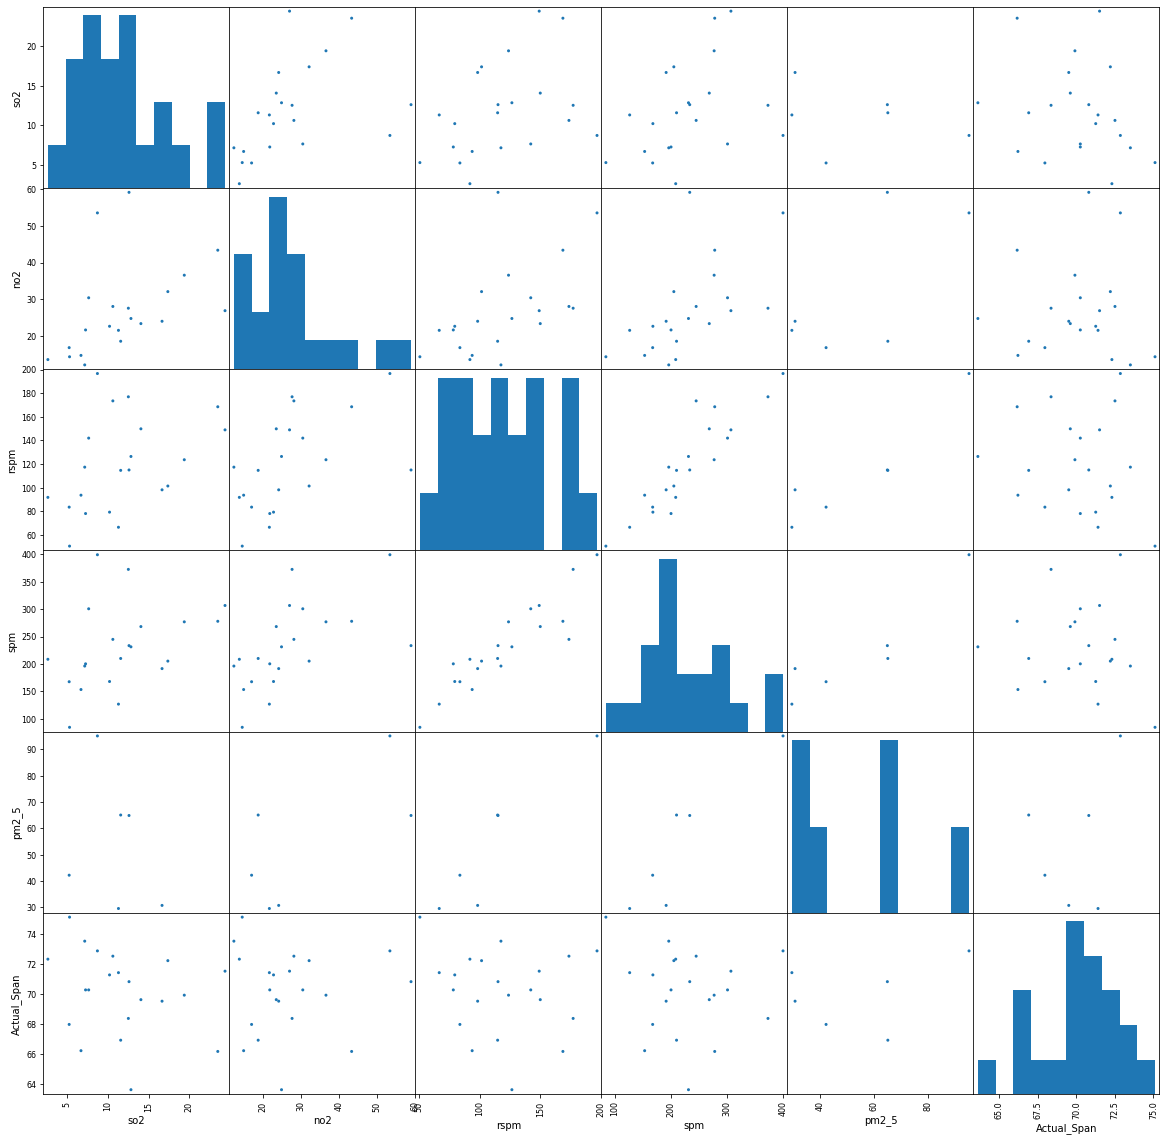

In [17]:
pd.plotting.scatter_matrix(life_air_avg, alpha = 1,figsize = (20,20));
plt.savefig('images/scatter_matrix')

In [18]:
life_air_avg = life_air_avg.set_index('State')

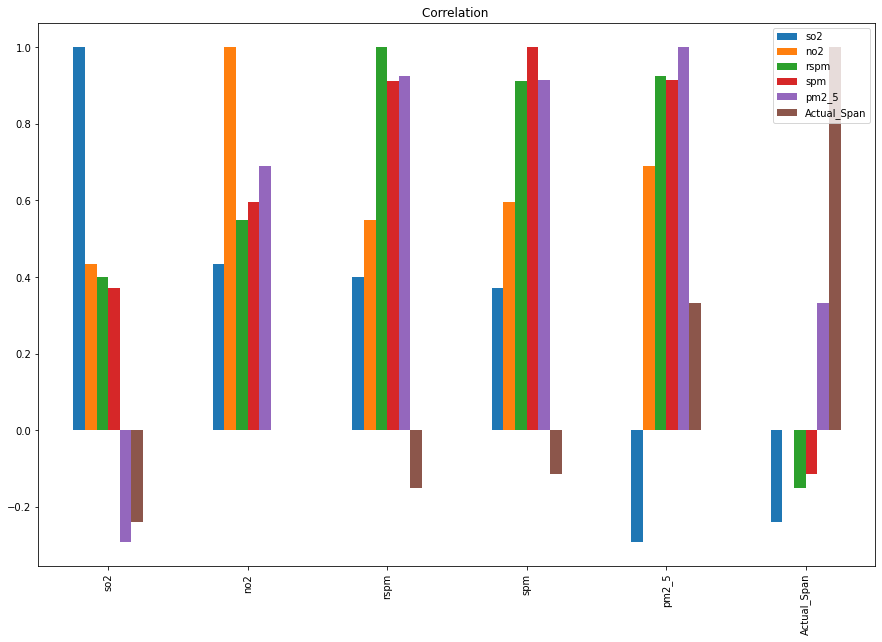

In [19]:
life_air_avg.corr().plot(kind = 'bar',figsize = (15,10))
plt.title('Correlation ')
plt.savefig('images/life_air_corr')

In [20]:
life_air_avg

,so2,no2,rspm,spm,pm2_5,Actual_Span
State,,,,,,
andhra pradesh,7.284845,21.704451,78.182824,200.260378,NaN,70.25
assam,6.723263,14.793691,93.724912,153.355386,NaN,66.20
bihar,19.381476,36.575525,123.705176,276.917416,NaN,69.90
chhattisgarh,12.846609,24.815961,126.472399,231.290969,NaN,63.60
delhi,8.737273,53.489147,196.639771,399.402088,95.113208,72.85
gujarat,16.656343,24.065631,98.244510,191.567930,30.729696,69.50
haryana,14.064957,23.428311,149.860537,268.264804,NaN,69.60
himachal pradesh,2.667013,13.658688,91.870202,208.575630,NaN,72.30
jammu & kashmir,7.180521,12.213181,117.449483,196.221053,NaN,73.50


In [21]:
life_air_avg.corr()

,so2,no2,rspm,spm,pm2_5,Actual_Span
so2,1.000000,0.434234,0.399262,0.370581,-0.291411,-0.241074
no2,0.434234,1.000000,0.549125,0.596464,0.690616,-0.000013
rspm,0.399262,0.549125,1.000000,0.911177,0.926074,-0.152593
spm,0.370581,0.596464,0.911177,1.000000,0.915891,-0.113794
pm2_5,-0.291411,0.690616,0.926074,0.915891,1.000000,0.332107
Actual_Span,-0.241074,-0.000013,-0.152593,-0.113794,0.332107,1.000000


In [22]:
life_air_avg.rspm / life_air_avg.pm2_5

State
andhra pradesh           NaN
assam                    NaN
bihar                    NaN
chhattisgarh             NaN
delhi               2.067429
gujarat             3.197054
haryana                  NaN
himachal pradesh         NaN
jammu & kashmir          NaN
jharkhand                NaN
karnataka                NaN
kerala                   NaN
madhya pradesh      1.763140
maharashtra              NaN
odisha              1.981320
punjab                   NaN
rajasthan                NaN
tamil nadu          2.253287
uttar pradesh            NaN
uttarakhand              NaN
west bengal         1.772828
dtype: float64

In [23]:
life_air_avg.spm / life_air_avg.pm2_5

State
andhra pradesh           NaN
assam                    NaN
bihar                    NaN
chhattisgarh             NaN
delhi               4.199228
gujarat             6.233968
haryana                  NaN
himachal pradesh         NaN
jammu & kashmir          NaN
jharkhand                NaN
karnataka                NaN
kerala                   NaN
madhya pradesh      3.228601
maharashtra              NaN
odisha              3.971412
punjab                   NaN
rajasthan                NaN
tamil nadu          4.288568
uttar pradesh            NaN
uttarakhand              NaN
west bengal         3.598463
dtype: float64

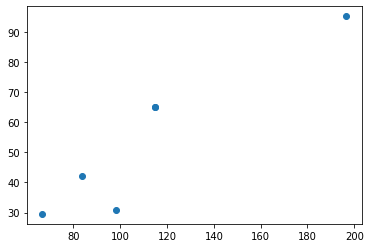

In [24]:
plt.scatter(life_air_avg.rspm , life_air_avg.pm2_5)


In [25]:
air.corr()

,so2,no2,rspm,spm,pm2_5,year
so2,1.000000,0.340555,0.165325,0.148325,0.035980,-0.196518
no2,0.340555,1.000000,0.369923,0.326170,0.509357,-0.077676
rspm,0.165325,0.369923,1.000000,0.801752,0.754709,-0.039412
spm,0.148325,0.326170,0.801752,1.000000,NaN,-0.030920
pm2_5,0.035980,0.509357,0.754709,NaN,1.000000,0.064030
year,-0.196518,-0.077676,-0.039412,-0.030920,0.064030,1.000000


In [26]:
noNaN = air[['rspm','pm2_5']].dropna().copy()

In [27]:
LR = LinearRegression().fit(noNaN.rspm.values.reshape(-1,1),noNaN.pm2_5)

In [28]:
LR.coef_,LR.intercept_

(array([0.44775662]), -0.42348805644085274)

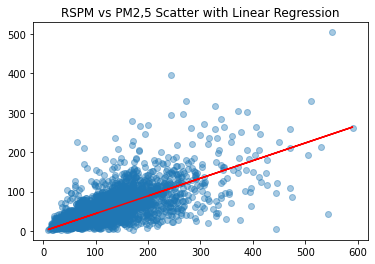

In [29]:
plt.scatter(air.rspm,air.pm2_5, alpha = .4)
plt.plot(noNaN.rspm,noNaN.rspm*LR.coef_+LR.intercept_, color = 'red')
plt.title('RSPM vs PM2,5 Scatter with Linear Regression')
plt.savefig('images/RPSMvsPM2_5LinReg')

In [30]:
air['pm2_5'].fillna(air['rspm']*LR.coef_[0], inplace = True)

In [31]:
air

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,150.0,February - M021990,andhra pradesh,hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990.0
1,151.0,February - M021990,andhra pradesh,hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990.0
2,152.0,February - M021990,andhra pradesh,hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01,1990.0
3,150.0,March - M031990,andhra pradesh,hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01,1990.0
4,151.0,March - M031990,andhra pradesh,hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,west bengal,uluberia,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",64.029196,2015-12-24,2015.0
435738,SAMP,29-12-15,west bengal,uluberia,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",76.566381,2015-12-29,2015.0
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
predict_pm2_5 = air.groupby('state').mean()
predict_pm2_5.drop('year',axis = 1, inplace=True)
predict_pm2_5.dropna(how = 'all', inplace=True)
predict_pm2_5_life = predict_pm2_5.merge(life[['State','Actual_Span']], left_on = 'state', right_on = 'State').copy()
predict_pm2_5_life.set_index('State')

,so2,no2,rspm,spm,pm2_5,Actual_Span
State,,,,,,
andhra pradesh,7.284845,21.704451,78.182824,200.260378,35.006877,70.25
assam,6.723263,14.793691,93.724912,153.355386,41.965950,66.20
bihar,19.381476,36.575525,123.705176,276.917416,55.389811,69.90
chhattisgarh,12.846609,24.815961,126.472399,231.290969,56.628854,63.60
delhi,8.737273,53.489147,196.639771,399.402088,87.841022,72.85
gujarat,16.656343,24.065631,98.244510,191.567930,42.954755,69.50
haryana,14.064957,23.428311,149.860537,268.264804,67.101047,69.60
himachal pradesh,2.667013,13.658688,91.870202,208.575630,41.135491,72.30
jammu & kashmir,7.180521,12.213181,117.449483,196.221053,52.588783,73.50


In [33]:
predict_pm2_5_life.corr()

,so2,no2,rspm,spm,pm2_5,Actual_Span
so2,1.000000,0.434234,0.399262,0.370581,0.396622,-0.241074
no2,0.434234,1.000000,0.549125,0.596464,0.550236,-0.000013
rspm,0.399262,0.549125,1.000000,0.911177,0.999869,-0.152593
spm,0.370581,0.596464,0.911177,1.000000,0.910763,-0.113794
pm2_5,0.396622,0.550236,0.999869,0.910763,1.000000,-0.154595
Actual_Span,-0.241074,-0.000013,-0.152593,-0.113794,-0.154595,1.000000


<AxesSubplot:>

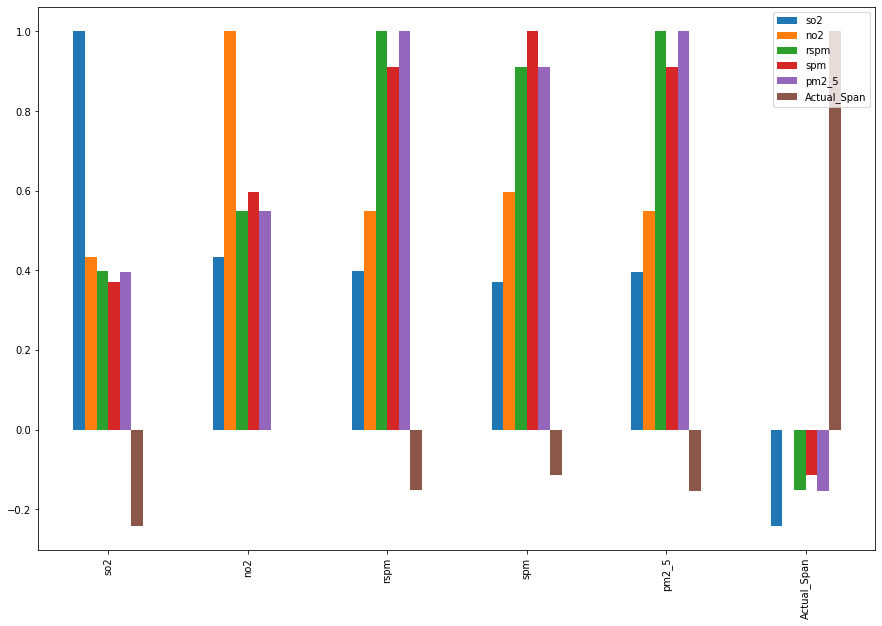

In [34]:
predict_pm2_5_life.corr().plot(kind='bar', figsize=(15,10))

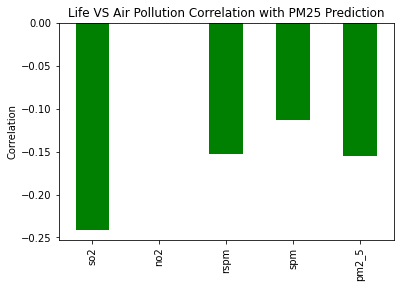

In [35]:
predict_pm2_5_life.corr().loc[['so2','no2','rspm','spm','pm2_5'],'Actual_Span'].plot(kind='bar',color = 'green')
plt.title('Life VS Air Pollution Correlation with PM25 Prediction')
plt.ylabel('Correlation')
plt.savefig('images/life_air_corr_with_pm25_filled')

In [53]:
def bootstrap(df,cols):
    return df.sample(frac=1, replace = True)[cols].corr().iloc[0,1]

In [57]:
bootstrap_corr = [bootstrap(predict_pm2_5_life,['so2','Actual_Span']) for _ in range(3000)]

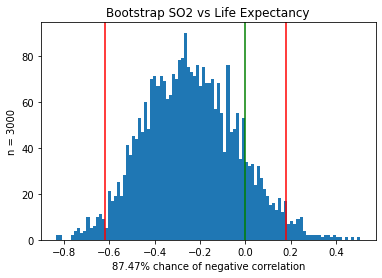

In [68]:
plt.hist(bootstrap_corr,bins = 100);
low,high = np.percentile(bootstrap_corr,[2.5,97.5])
plt.axvline(low,color = 'red')
plt.axvline(high,color = 'red')
plt.axvline(0,color = 'green')
plt.ylabel('n = 3000')
plt.xlabel(f'{round((np.array(bootstrap_corr)<0).mean()*100,2)}% chance of negative correlation')
plt.title('Bootstrap SO2 vs Life Expectancy')
plt.savefig('images/bootstrap_SO2.png')

In [60]:
(np.array(bootstrap_corr)<0).mean()

0.8746666666666667

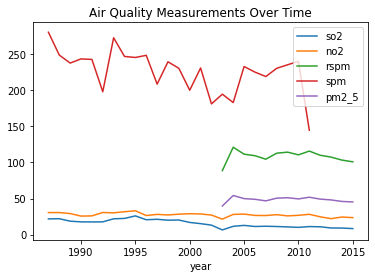

In [51]:
air_year = air.groupby('year')
air_year.mean().plot()
plt.title('Air Quality Measurements Over Time')
plt.savefig('images/air_quality_over_time.png')

In [61]:
bootstrap_corr_NO2 = [bootstrap(predict_pm2_5_life,['no2','Actual_Span']) for _ in range(3000)]

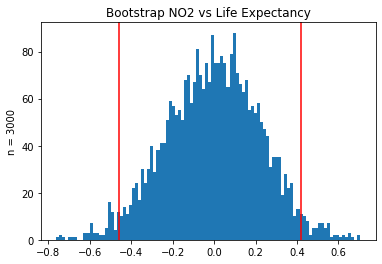

In [65]:
plt.hist(bootstrap_corr_NO2,bins = 100);
low,high = np.percentile(bootstrap_corr_NO2,[2.5,97.5])
plt.axvline(low,color = 'red')
plt.axvline(high,color = 'red')
plt.ylabel('n = 3000')
plt.title('Bootstrap NO2 vs Life Expectancy')
plt.savefig('images/bootstrap_NO2.png')

,so2,no2,rspm,spm,pm2_5
year,,,,,
1987.0,6853.700000,1.009290e+04,0.000000e+00,1.158440e+05,0.000000e+00
1988.0,11645.700000,1.616020e+04,0.000000e+00,1.510470e+05,0.000000e+00
1989.0,14673.100000,2.346030e+04,0.000000e+00,1.940160e+05,0.000000e+00
1990.0,25344.100000,3.746600e+04,0.000000e+00,3.419400e+05,0.000000e+00
1991.0,26640.400000,4.017560e+04,0.000000e+00,3.666940e+05,0.000000e+00
1992.0,19633.500000,3.579860e+04,0.000000e+00,2.285370e+05,0.000000e+00
1993.0,30127.600000,4.168390e+04,0.000000e+00,4.037800e+04,0.000000e+00
1994.0,33268.700000,4.723430e+04,0.000000e+00,3.348590e+05,0.000000e+00
1995.0,41497.400000,5.474420e+04,0.000000e+00,4.085620e+05,0.000000e+00
